## Movies Recommendation System

#### 1) Load the libraries

In [1]:
import numpy as np
import pandas as pd
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

#### 2) Load the dataset

In [2]:
movies = pd.read_excel('/content/movies_normalized.xlsx')


In [3]:
movies.drop_duplicates(inplace=True)

In [4]:
movies

,userId,movieId,rating,title,year_x,month_x,day_x,day_of_week_x,Action,Adventure,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,0.314871,Toy Story (1995),-0.664156,0.098856,1.571573,1.580365,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,3,0.314871,Grumpier Old Men (1995),-0.664156,0.098856,1.571573,1.580365,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,6,0.314871,Heat (1995),-0.664156,0.098856,1.571573,1.580365,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1,47,1.239139,Seven (a.k.a. Se7en) (1995),-0.664156,0.098856,1.571573,1.580365,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,50,1.239139,"Usual Suspects, The (1995)",-0.664156,0.098856,1.571573,1.580365,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,18,5445,0.314871,Minority Report (2002),1.327066,-1.349925,-0.816023,0.103897,1,0,...,0,0,0,0,1,0,1,1,0,0
1995,18,5459,-1.071532,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,1.327066,-1.349925,-1.067349,-0.880415,1,0,...,0,0,0,0,0,0,1,0,0,0
1996,18,5464,0.314871,Road to Perdition (2002),1.327066,-1.060169,0.566269,-0.880415,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,18,5481,-0.609398,Austin Powers in Goldmember (2002),1.327066,-1.349925,-1.067349,-0.880415,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1990 entries, 0 to 1998
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userId         1990 non-null   int64  
 1   movieId        1990 non-null   int64  
 2   rating         1990 non-null   float64
 3   title          1990 non-null   object 
 4   year_x         1990 non-null   float64
 5   month_x        1990 non-null   float64
 6   day_x          1990 non-null   float64
 7   day_of_week_x  1990 non-null   float64
 8   Action         1990 non-null   int64  
 9   Adventure      1990 non-null   int64  
 10  Animation      1990 non-null   int64  
 11  Children       1990 non-null   int64  
 12  Comedy         1990 non-null   int64  
 13  Crime          1990 non-null   int64  
 14  Documentary    1990 non-null   int64  
 15  Drama          1990 non-null   int64  
 16  Fantasy        1990 non-null   int64  
 17  Film-Noir      1990 non-null   int64  
 18  Horror       

In [6]:
movies.describe()

,userId,movieId,rating,year_x,month_x,day_x,day_of_week_x,Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,...,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000
mean,9.092462,10413.955276,-0.004675,-0.005627,-0.002049,0.000154,-0.005416,0.300000,0.247739,0.073869,...,0.011558,0.049246,0.037688,0.044724,0.075879,0.205528,0.156281,0.250251,0.058794,0.029648
std,5.657431,26147.249115,0.999751,0.998988,1.000832,0.999059,0.999159,0.458373,0.431808,0.261624,...,0.106911,0.216436,0.190490,0.206748,0.264872,0.404188,0.363213,0.433267,0.235298,0.169658
min,1.000000,1.000000,-2.920069,-1.161961,-1.639681,-2.072653,-1.372571,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,480.000000,-0.609398,-0.913059,-1.060169,-0.690360,-0.880415,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,1300.500000,0.314871,-0.539704,0.098856,-0.062046,0.103897,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15.000000,3796.750000,0.777005,1.202615,0.968125,0.943258,0.596053,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,0.000000
max,18.000000,166635.000000,1.239139,1.575969,1.547638,1.697236,1.580365,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 3) Univariate Analysis

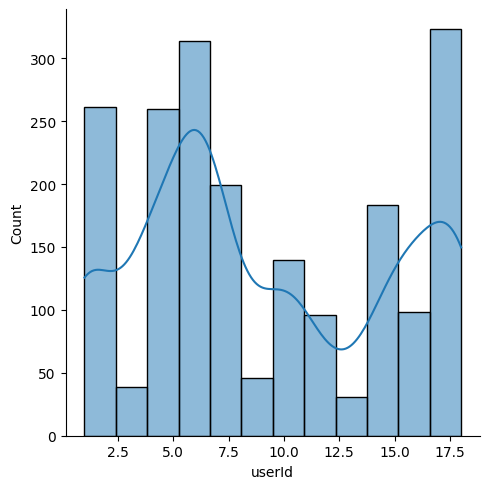

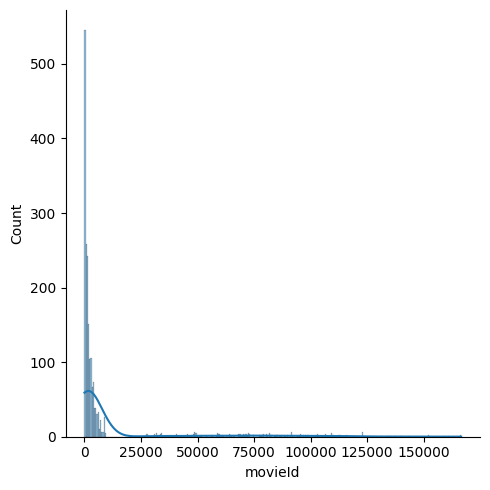

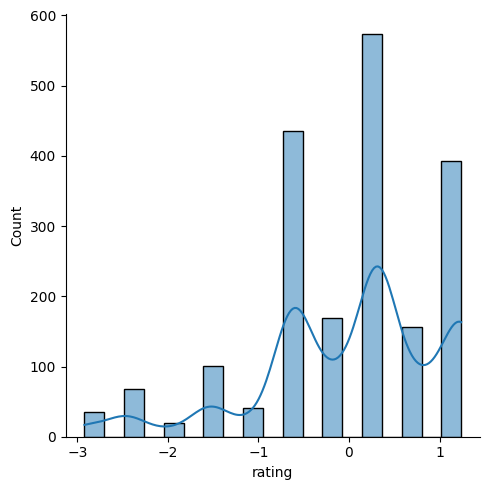

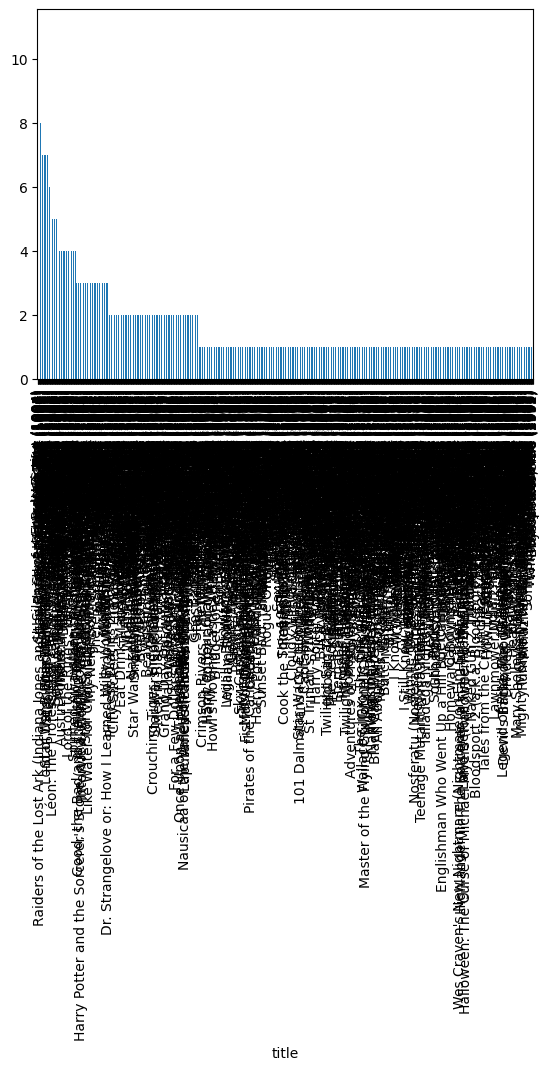

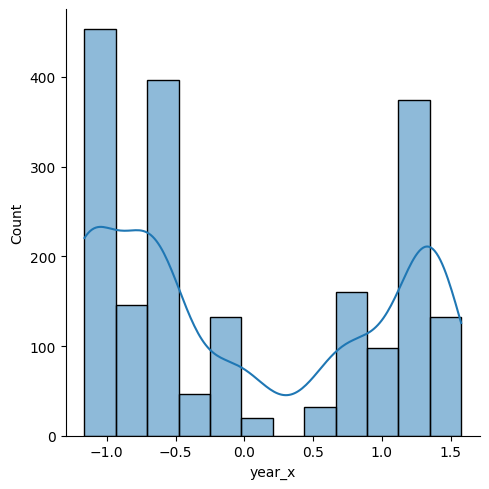

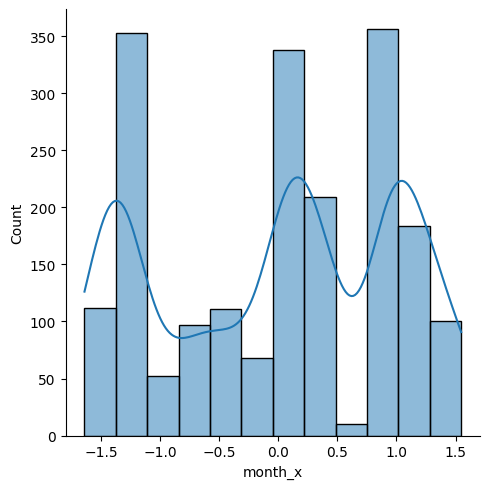

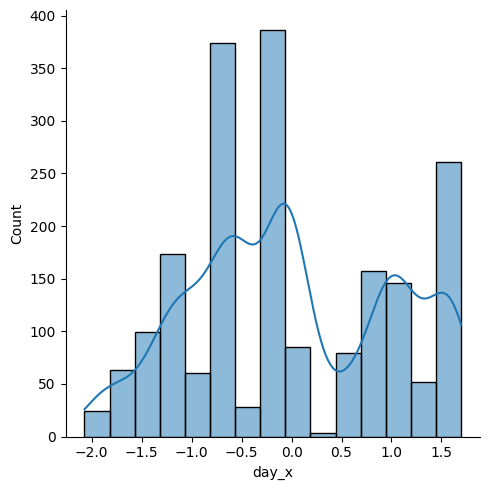

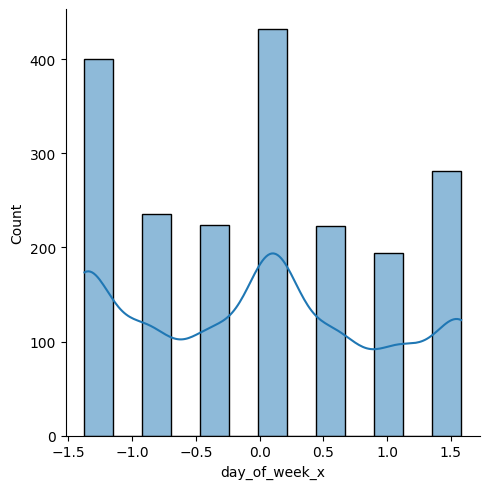

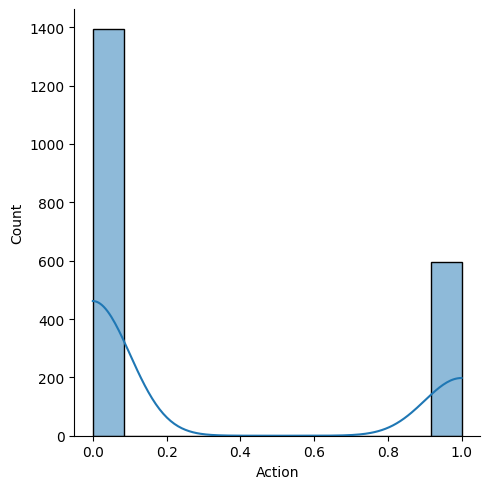

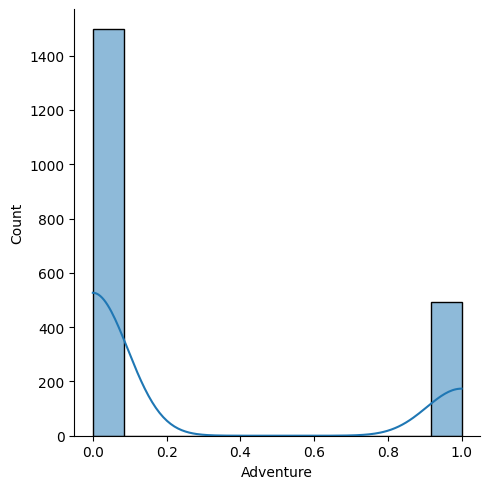

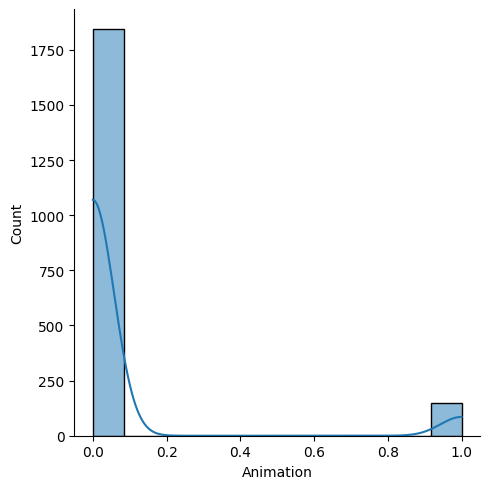

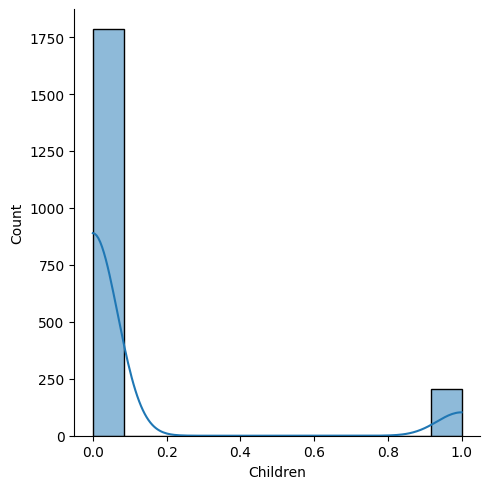

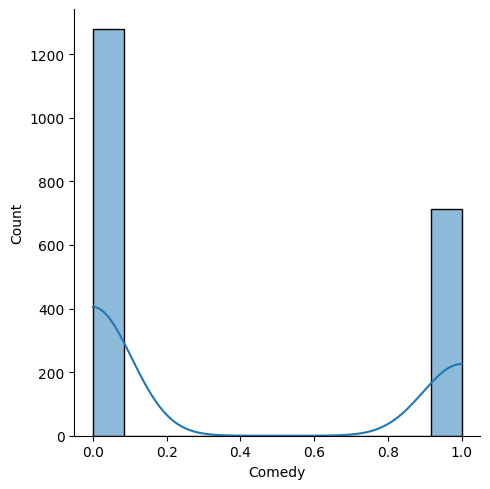

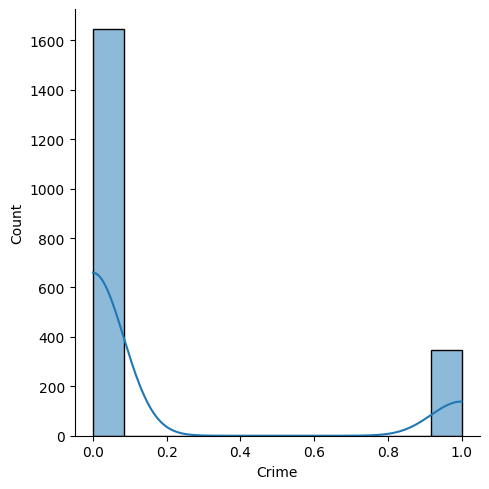

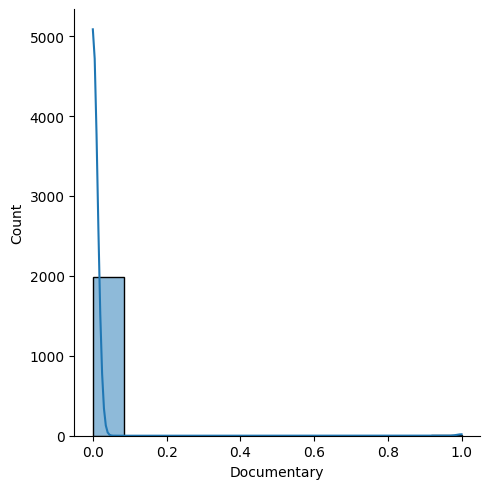

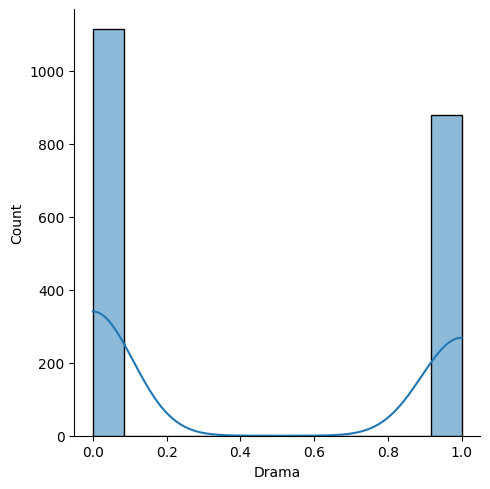

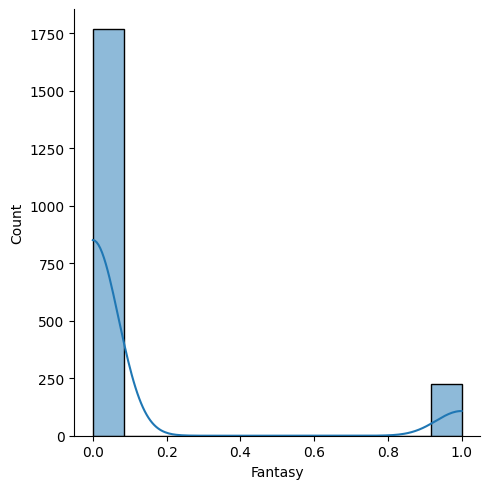

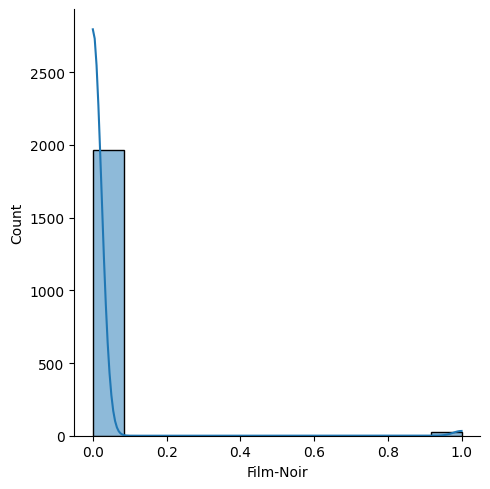

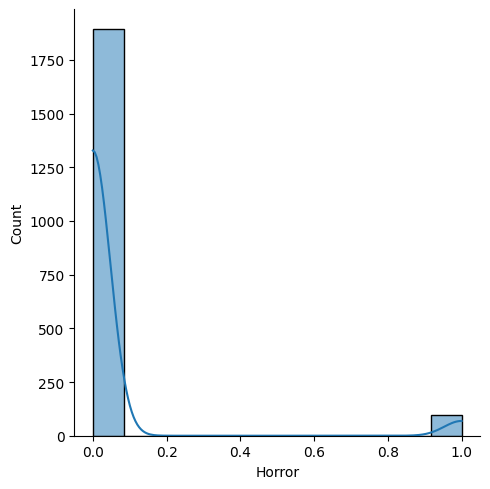

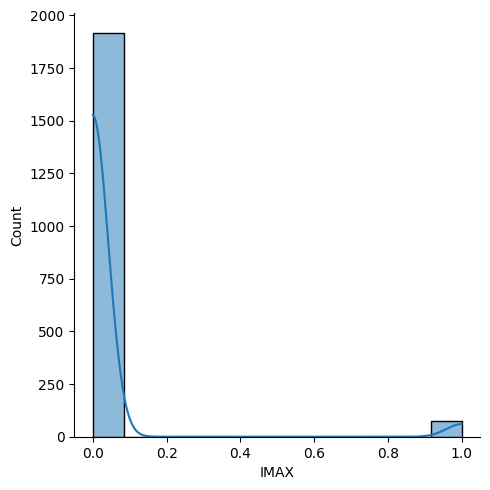

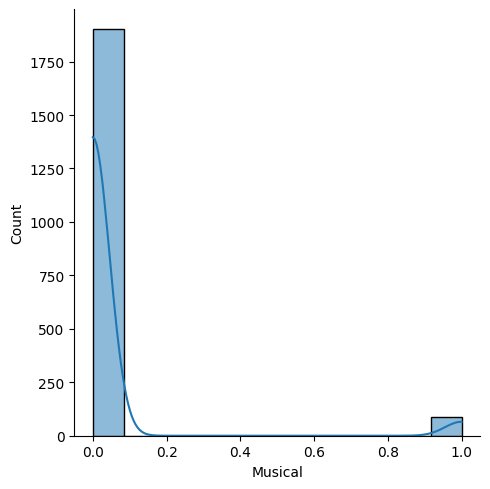

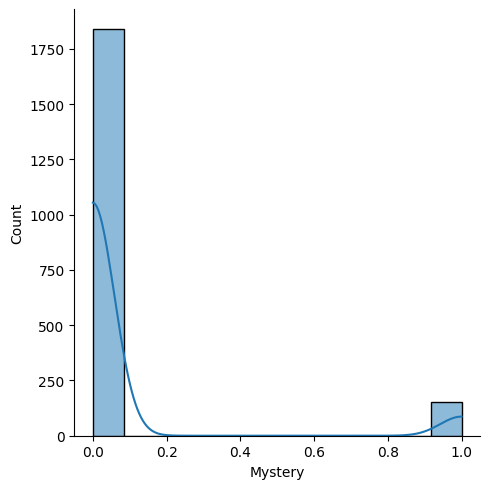

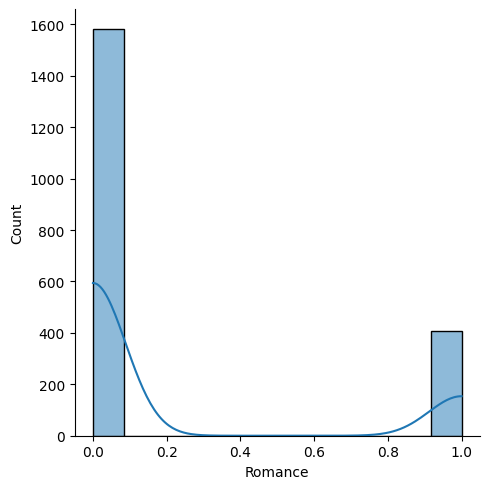

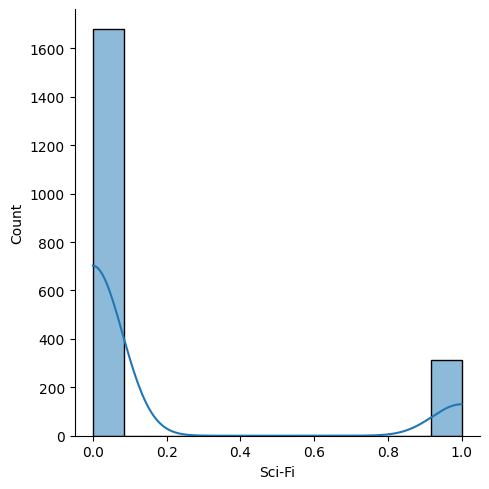

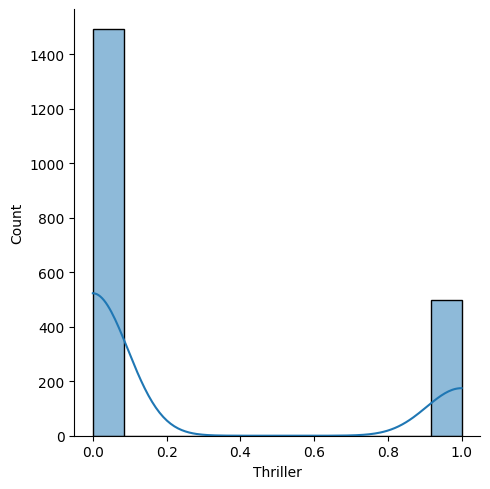

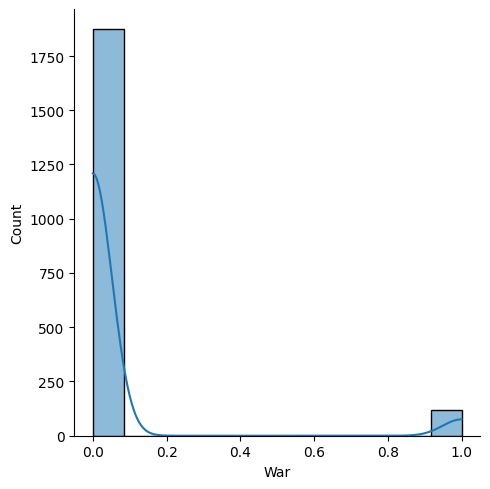

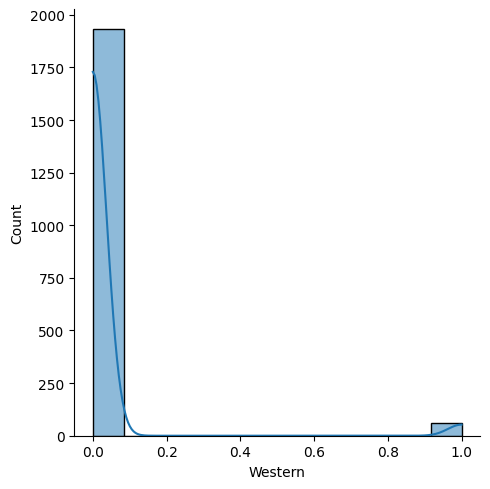

In [7]:
for i in movies:
  if movies[i].dtype == 'int' or movies[i].dtype == 'float':
    sns.displot(movies[i],kde=True)
    plt.show()
  elif movies[i].dtype == 'object':
    movies[i].value_counts().plot(kind='bar')
    plt.show()
  else:
    pass

#### 4) Bivariate Analysis

<Axes: >

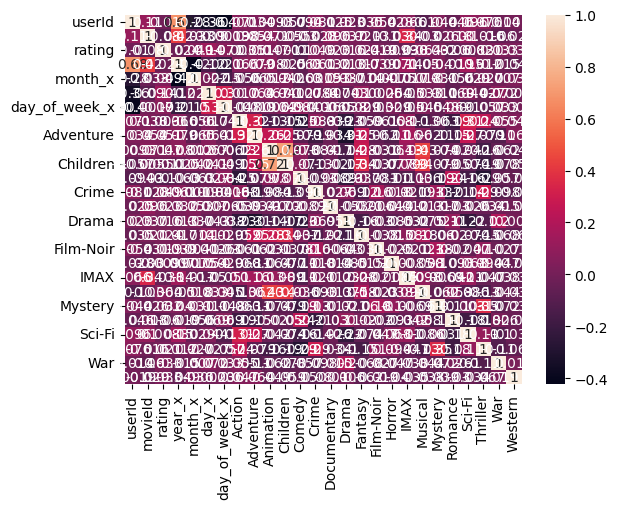

In [8]:
movies_corr = movies.select_dtypes(include=['int','float'])
sns.heatmap(movies_corr.corr(),annot = True)

#### 5) Chi Square test

* H0 : Null Hypothesis : Both the variables are independent of each other
* H1 : Alternate Hypothesis : Both the variables are dependent of each other

In [9]:
from scipy.stats import chi2_contingency

In [10]:
def chi2_sq_test(var1,var2):
  table = pd.crosstab(var1,var2)
  _,p,_,_ = chi2_contingency(table)
  if p <= 0.05:
    print("Accept the Alternate Hypothesis",round(p,2))
  else:
    print("Accept the null Hypothesis")
  return table

In [11]:
chi2_sq_test(movies['Adventure'],movies['Action'])

Accept the Alternate Hypothesis 0.0


Action,0,1
Adventure,,
0,1172,325
1,221,272


In [12]:
movies.head()

,userId,movieId,rating,title,year_x,month_x,day_x,day_of_week_x,Action,Adventure,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,0.314871,Toy Story (1995),-0.664156,0.098856,1.571573,1.580365,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,3,0.314871,Grumpier Old Men (1995),-0.664156,0.098856,1.571573,1.580365,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,6,0.314871,Heat (1995),-0.664156,0.098856,1.571573,1.580365,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1,47,1.239139,Seven (a.k.a. Se7en) (1995),-0.664156,0.098856,1.571573,1.580365,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,50,1.239139,"Usual Suspects, The (1995)",-0.664156,0.098856,1.571573,1.580365,0,0,...,0,0,0,0,1,0,0,1,0,0


In [13]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1990 entries, 0 to 1998
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userId         1990 non-null   int64  
 1   movieId        1990 non-null   int64  
 2   rating         1990 non-null   float64
 3   title          1990 non-null   object 
 4   year_x         1990 non-null   float64
 5   month_x        1990 non-null   float64
 6   day_x          1990 non-null   float64
 7   day_of_week_x  1990 non-null   float64
 8   Action         1990 non-null   int64  
 9   Adventure      1990 non-null   int64  
 10  Animation      1990 non-null   int64  
 11  Children       1990 non-null   int64  
 12  Comedy         1990 non-null   int64  
 13  Crime          1990 non-null   int64  
 14  Documentary    1990 non-null   int64  
 15  Drama          1990 non-null   int64  
 16  Fantasy        1990 non-null   int64  
 17  Film-Noir      1990 non-null   int64  
 18  Horror       

#### 7) One hot encoding

In [14]:
movies_enc = pd.get_dummies(movies).astype('int')
movies_enc

,userId,movieId,rating,year_x,month_x,day_x,day_of_week_x,Action,Adventure,Animation,...,title_X2: X-Men United (2003),title_Yes Man (2008),title_You've Got Mail (1998),title_Young Frankenstein (1974),title_Young Sherlock Holmes (1985),title_Zombieland (2009),title_Zoolander (2001),title_Zootopia (2016),title_xXx (2002),title_¡Three Amigos! (1986)
0,1,1,0,0,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,3,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,6,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,47,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,50,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,18,5445,0,1,-1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1995,18,5459,-1,1,-1,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,18,5464,0,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,18,5481,0,1,-1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 8) Split into x and y

In [15]:
y = movies_enc['rating']
x=movies_enc.drop('rating',axis=1)

#### 9) Split into x_train , y_train , x_test , y_test

In [16]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.2,random_state=5)

In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(1592, 1225)
(1592,)
(398, 1225)
(398,)


#### 10) Standard Scalar

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression


In [22]:
logreg = LogisticRegression()

In [23]:
logreg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
y_hat_train = logreg.predict(x_train)
y_hat_test = logreg.predict(x_test)

#### Evaluate the model


In [25]:
def model_eval(var1,var2):
  conf_matrix = confusion_matrix(var1,var2)
  acc_score = accuracy_score(var1,var2)
  class_report = classification_report(var1,var2)
  print(round(acc_score,2))
  print(conf_matrix)
  print(class_report)


In [26]:
model_eval(y_train,y_hat_train)

0.89
[[  64    3    7    3]
 [   2  101   23    5]
 [   8   12 1013   40]
 [   1    3   62  245]]
              precision    recall  f1-score   support

          -2       0.85      0.83      0.84        77
          -1       0.85      0.77      0.81       131
           0       0.92      0.94      0.93      1073
           1       0.84      0.79      0.81       311

    accuracy                           0.89      1592
   macro avg       0.86      0.83      0.85      1592
weighted avg       0.89      0.89      0.89      1592



In [27]:
model_eval(y_test,y_hat_test)

0.6
[[  1   1  21   3]
 [  3   0  26   1]
 [  4   9 221  27]
 [  2   1  63  15]]
              precision    recall  f1-score   support

          -2       0.10      0.04      0.06        26
          -1       0.00      0.00      0.00        30
           0       0.67      0.85      0.75       261
           1       0.33      0.19      0.24        81

    accuracy                           0.60       398
   macro avg       0.27      0.27      0.26       398
weighted avg       0.51      0.60      0.54       398



####Inference
1) High bias and low variance
2) So many misclassifications in the confusion matrix
3) Accuracy for test is not so good

Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dtree = DecisionTreeClassifier()


In [30]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [31]:
y_hat_train_dtree = dtree.predict(x_train)
y_hat_test_dtree = dtree.predict(x_test)

#### Evaluate the model

In [32]:
model_eval(y_train,y_hat_train_dtree)

1.0
[[  77    0    0    0]
 [   0  131    0    0]
 [   0    0 1073    0]
 [   0    0    0  311]]
              precision    recall  f1-score   support

          -2       1.00      1.00      1.00        77
          -1       1.00      1.00      1.00       131
           0       1.00      1.00      1.00      1073
           1       1.00      1.00      1.00       311

    accuracy                           1.00      1592
   macro avg       1.00      1.00      1.00      1592
weighted avg       1.00      1.00      1.00      1592



In [33]:
model_eval(y_test,y_hat_test_dtree)

0.62
[[  4   1  16   5]
 [  2   6  20   2]
 [  9  16 209  27]
 [  0   4  50  27]]
              precision    recall  f1-score   support

          -2       0.27      0.15      0.20        26
          -1       0.22      0.20      0.21        30
           0       0.71      0.80      0.75       261
           1       0.44      0.33      0.38        81

    accuracy                           0.62       398
   macro avg       0.41      0.37      0.38       398
weighted avg       0.59      0.62      0.60       398



#### Inference
1) High bias and low variance


Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)

In [36]:
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [37]:
y_hat_train_rf = rf.predict(x_train)
y_hat_test_rf = rf.predict(x_test)

#### Evaluate the model

In [38]:
model_eval(y_train , y_hat_train_rf)

1.0
[[  77    0    0    0]
 [   0  131    0    0]
 [   0    0 1073    0]
 [   0    0    0  311]]
              precision    recall  f1-score   support

          -2       1.00      1.00      1.00        77
          -1       1.00      1.00      1.00       131
           0       1.00      1.00      1.00      1073
           1       1.00      1.00      1.00       311

    accuracy                           1.00      1592
   macro avg       1.00      1.00      1.00      1592
weighted avg       1.00      1.00      1.00      1592



In [39]:
model_eval(y_test , y_hat_test_rf)

0.69
[[  1   0  23   2]
 [  0   1  29   0]
 [  0   0 254   7]
 [  0   1  61  19]]
              precision    recall  f1-score   support

          -2       1.00      0.04      0.07        26
          -1       0.50      0.03      0.06        30
           0       0.69      0.97      0.81       261
           1       0.68      0.23      0.35        81

    accuracy                           0.69       398
   macro avg       0.72      0.32      0.32       398
weighted avg       0.69      0.69      0.61       398



In [40]:
from sklearn.model_selection import RandomizedSearchCV

In [41]:
param_distributions = {
    'n_estimators': range(1,200),
    'max_depth': range(1,50),
    'min_samples_split': range(1,50),
    'min_samples_leaf':range(1,50)

}

In [42]:
random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=param_distributions,
                                   n_iter=100,  # Number of parameter settings sampled
                                   scoring='accuracy',  # Evaluation metric
                                   cv=3,  # Cross-validation folds
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)  # Parallelize jobs

In [43]:
random_search.fit(x_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
6 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_p

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': range(1, 50),
                                        'min_samples_leaf': range(1, 50),
                                        'min_samples_split': range(1, 50),
                                        'n_estimators': range(1, 200)},
                   random_state=42, scoring='accuracy', verbose=2)

In [44]:
random_search.best_params_

{'n_estimators': 180,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_depth': 44}

#### Inference
1) Low bias and high variance
2) It is overfitting

Gradient Boosting

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
gb = GradientBoostingClassifier(n_estimators = 200)

In [47]:
gb.fit(x_train , y_train)

GradientBoostingClassifier(n_estimators=200)

In [48]:
y_hat_train_gb = gb.predict(x_train)
y_hat_test_gb = gb.predict(x_test)

#### Evaluate the model

In [49]:
model_eval(y_train , y_hat_train_gb)

0.87
[[  51    0   19    7]
 [   0   74   53    4]
 [   0    0 1066    7]
 [   0    0  114  197]]
              precision    recall  f1-score   support

          -2       1.00      0.66      0.80        77
          -1       1.00      0.56      0.72       131
           0       0.85      0.99      0.92      1073
           1       0.92      0.63      0.75       311

    accuracy                           0.87      1592
   macro avg       0.94      0.71      0.80      1592
weighted avg       0.88      0.87      0.86      1592



In [50]:
model_eval(y_test , y_hat_test_gb)

0.68
[[  0   1  23   2]
 [  2   0  28   0]
 [  2   3 248   8]
 [  0   0  59  22]]
              precision    recall  f1-score   support

          -2       0.00      0.00      0.00        26
          -1       0.00      0.00      0.00        30
           0       0.69      0.95      0.80       261
           1       0.69      0.27      0.39        81

    accuracy                           0.68       398
   macro avg       0.35      0.31      0.30       398
weighted avg       0.59      0.68      0.60       398



K Nearest Neighbours

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
np.sqrt(len(x_train))

39.89987468652001

In [53]:
knn = KNeighborsClassifier(n_neighbors = 30)

In [54]:
knn.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=30)

In [55]:
y_hat_train_knn = knn.predict(x_train)
y_hat_test_knn = knn.predict(x_test)

#### Evaluate the model

In [56]:
model_eval(y_train , y_hat_train_knn)

0.67
[[   0    0   77    0]
 [   0    0  131    0]
 [   0    0 1073    0]
 [   0    0  311    0]]
              precision    recall  f1-score   support

          -2       0.00      0.00      0.00        77
          -1       0.00      0.00      0.00       131
           0       0.67      1.00      0.81      1073
           1       0.00      0.00      0.00       311

    accuracy                           0.67      1592
   macro avg       0.17      0.25      0.20      1592
weighted avg       0.45      0.67      0.54      1592



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
model_eval(y_test , y_hat_test_knn)

0.66
[[  0   0  26   0]
 [  0   0  30   0]
 [  0   0 261   0]
 [  0   0  81   0]]
              precision    recall  f1-score   support

          -2       0.00      0.00      0.00        26
          -1       0.00      0.00      0.00        30
           0       0.66      1.00      0.79       261
           1       0.00      0.00      0.00        81

    accuracy                           0.66       398
   macro avg       0.16      0.25      0.20       398
weighted avg       0.43      0.66      0.52       398



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


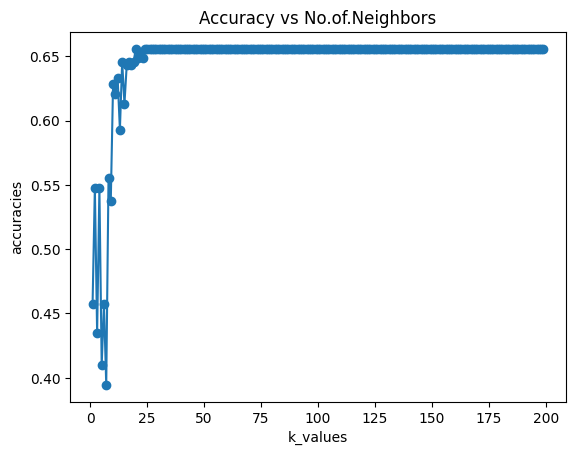

In [58]:
k_values = range(1,200)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k )
    knn.fit(x_train , y_train)
    y_hat_train_knn = knn.predict(x_train)
    y_hat_test_knn = knn.predict(x_test)
    acc_score = accuracy_score(y_test , y_hat_test_knn)
    accuracies.append(acc_score)

plt.plot(k_values , accuracies , marker = 'o' )
plt.xlabel("k_values")
plt.ylabel("accuracies")
plt.title("Accuracy vs No.of.Neighbors")
plt.show()

In [59]:
best_k_index = accuracies.index(max(accuracies))
best_k = k_values[best_k_index]
print(best_k)

20


Support Vector Machines

In [60]:
from sklearn.svm import SVC

In [61]:
svm = SVC(kernel ='sigmoid',degree=2, C= 1)

In [62]:
svm.fit(x_train , y_train)


SVC(C=1, degree=2, kernel='sigmoid')

In [63]:
y_hat_train_svm = svm.predict(x_train)
y_hat_test_svm = svm.predict(x_test)

#### Evaluate the model

In [64]:
model_eval(y_train , y_hat_train_svm)

0.78
[[   0    0   75    2]
 [   0   31  100    0]
 [   0    0 1073    0]
 [   0    1  177  133]]
              precision    recall  f1-score   support

          -2       0.00      0.00      0.00        77
          -1       0.97      0.24      0.38       131
           0       0.75      1.00      0.86      1073
           1       0.99      0.43      0.60       311

    accuracy                           0.78      1592
   macro avg       0.68      0.42      0.46      1592
weighted avg       0.78      0.78      0.73      1592



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
model_eval(y_test , y_hat_test_svm)

0.63
[[  0   0  24   2]
 [  0   0  30   0]
 [  0   2 248  11]
 [  0   0  78   3]]
              precision    recall  f1-score   support

          -2       0.00      0.00      0.00        26
          -1       0.00      0.00      0.00        30
           0       0.65      0.95      0.77       261
           1       0.19      0.04      0.06        81

    accuracy                           0.63       398
   macro avg       0.21      0.25      0.21       398
weighted avg       0.47      0.63      0.52       398



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Randomized Search cv

In [66]:
from sklearn.model_selection import RandomizedSearchCV

In [67]:
params = {
    'kernel' : ['linear' , 'poly' , 'sigmoid' , 'rbf'] ,
     'C' : [1,2,3] ,
     'degree' : [1,2,3]
}

In [68]:
random_search = RandomizedSearchCV(estimator = svm , param_distributions = params , verbose = True)

In [69]:
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=SVC(C=1, degree=2, kernel='sigmoid'),
                   param_distributions={'C': [1, 2, 3], 'degree': [1, 2, 3],
                                        'kernel': ['linear', 'poly', 'sigmoid',
                                                   'rbf']},
                   verbose=True)

In [70]:
random_search.best_params_

{'kernel': 'poly', 'degree': 2, 'C': 1}

* Best Algorithm -  K nearest neighbors